# 과제 4 Pima Indians Diabetes Database


In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import random
import sklearn as sk
from sklearn.model_selection import train_test_split

import pathlib
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


print(tf.__version__)
#시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

2.8.2


In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1(a). 주어진 데이터에 Exploratory Data Analysis(EDA)를 수행하시오.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data[data.duplicated(keep=False)] 
data = data.drop_duplicates() 

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


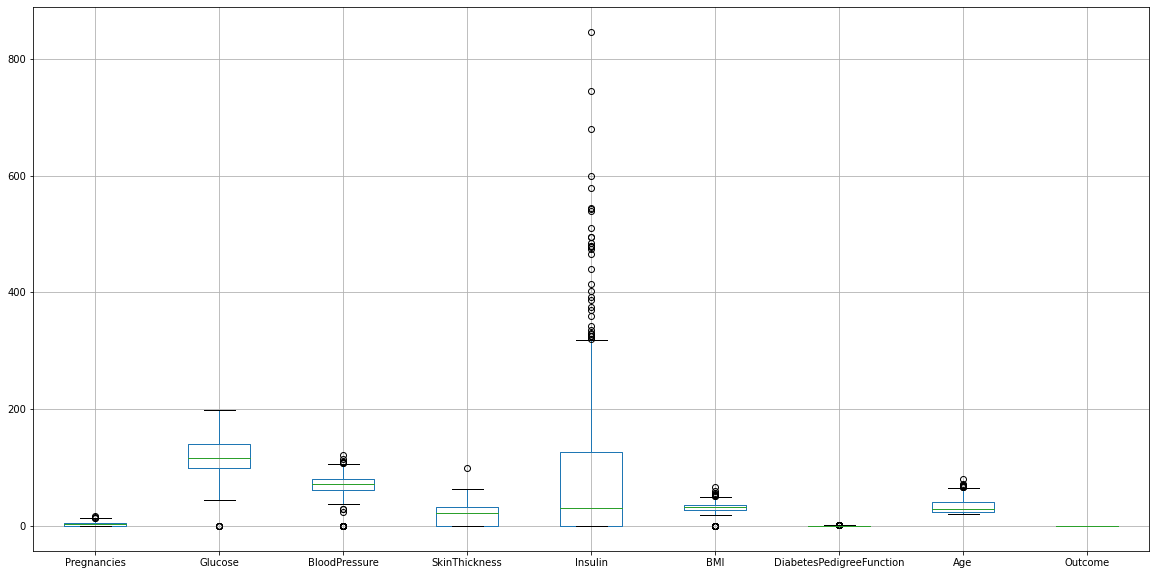

In [8]:
plt.figure(figsize = (20,10))
data.boxplot()

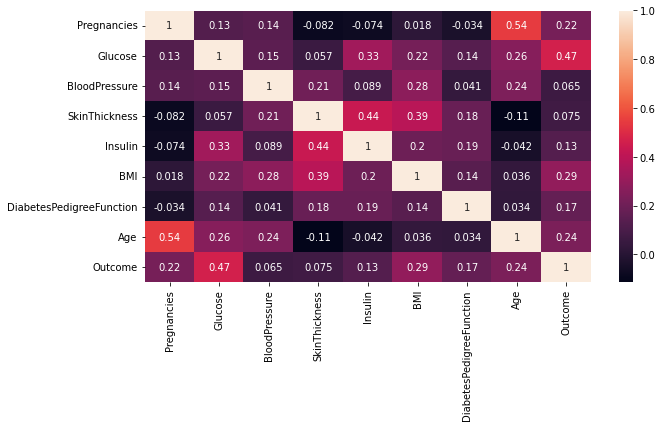

In [9]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True)

## 1(b). 주어진 데이터를 train, validation, test data로 각각 나누고 keras를 이용하여 MLP모델을 fitting한 뒤, train data와 validation data에 대한 learning curve를 시각화하시오.

In [10]:
x = data.iloc[:,:8]
y = data['Outcome']

In [11]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=0)

(1) MLP (logistic regression) 

In [13]:
learning_rate = 0.0005

def build_model():
  model =keras.models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(8,)))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

In [14]:
model = build_model()

In [15]:
history = model.fit(x_train, y_train, epochs=10, batch_size=8, validation_data = (x_val, y_val))

Epoch 1/10
62/62 [==============================] - 3s 16ms/step - loss: 3.0004 - accuracy: 0.5886 - val_loss: 2.5378 - val_accuracy: 0.5041
Epoch 2/10
62/62 [==============================] - 0s 5ms/step - loss: 1.5411 - accuracy: 0.5621 - val_loss: 1.5528 - val_accuracy: 0.3984
Epoch 3/10
62/62 [==============================] - 0s 4ms/step - loss: 1.2350 - accuracy: 0.5886 - val_loss: 1.4239 - val_accuracy: 0.6016
Epoch 4/10
62/62 [==============================] - 0s 6ms/step - loss: 1.0197 - accuracy: 0.5927 - val_loss: 1.0997 - val_accuracy: 0.6179
Epoch 5/10
62/62 [==============================] - 0s 4ms/step - loss: 0.9286 - accuracy: 0.6191 - val_loss: 0.9414 - val_accuracy: 0.5610
Epoch 6/10
62/62 [==============================] - 0s 8ms/step - loss: 0.8408 - accuracy: 0.6151 - val_loss: 0.9300 - val_accuracy: 0.5528
Epoch 7/10
62/62 [==============================] - 0s 6ms/step - loss: 0.8233 - accuracy: 0.6130 - val_loss: 0.7671 - val_accuracy: 0.6016
Epoch 8/10
62/62 [=

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.840803,0.615071,0.930042,0.552846,5
6,0.823313,0.613035,0.767100,0.601626,6
7,0.769177,0.619145,0.698720,0.601626,7
8,0.733254,0.635438,1.036180,0.617886,8
9,0.731562,0.629328,0.844607,0.634146,9


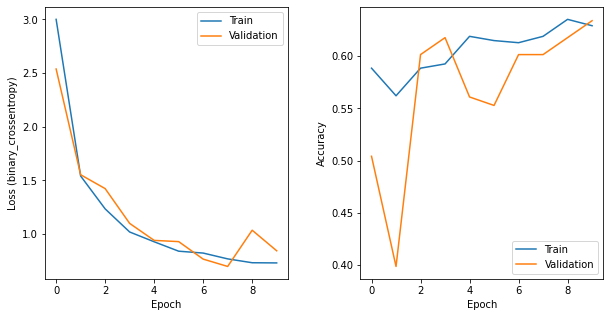

In [17]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss (binary_crossentropy)')
plt.plot(hist['epoch'], hist['loss'],label='Train')
plt.plot(hist['epoch'], hist['val_loss'],label = 'Validation')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['accuracy'],label='Train')
plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Validation')
plt.legend()
plt.show()

### 1(c). 학습결과를 confusion matrix와 특정 metrics를 선택해 평가하시오.

In [18]:
y_predict = model.predict(x_test)

In [19]:
y_pred = []
for x in y_predict:
  if x >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [20]:
conf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)

In [21]:
confusion_matrix = DataFrame(conf_matrix, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
confusion_matrix

,예측값(N),예측값(P)
실제값(N),105,2
실제값(P),47,0


In [22]:
TP = confusion_matrix['예측값(P)']['실제값(P)']
FP = confusion_matrix['예측값(P)']['실제값(N)']
TN = confusion_matrix['예측값(N)']['실제값(N)']
FN = confusion_matrix['예측값(N)']['실제값(P)']

In [23]:
accuracy = (TP+TN) / (TP+ TN+ FP+ FN)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
precision = TP/(TP+FP)
F1 = 2 * (precision*recall) / (precision + recall)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [24]:
print("accuracy = ", accuracy)
print("recall = ", recall)
print("specificity = ", specificity)
print("precision = ", precision)
print("F1 = ", F1)

accuracy =  0.6818181818181818
recall =  0.0
specificity =  0.9813084112149533
precision =  0.0
F1 =  nan


## 1(d). 모델을 변경하여 (ex) SVM, Logistic regression, …) 성능을 비교하시오. 어떤 모델이 더 좋은 성능을 보이는가?

(2) SVM

In [25]:
model2=SVC(kernel='linear', C=5, gamma=.1).fit(x_train, y_train)
y_prediction2=model2.predict(x_test)
y_pred2=pd.DataFrame(y_prediction2)

In [26]:
conf_matrix2 = sk.metrics.confusion_matrix(y_test, y_pred2)                             

In [27]:
confusion_matrix2 = DataFrame(conf_matrix2, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
confusion_matrix2

,예측값(N),예측값(P)
실제값(N),96,11
실제값(P),17,30


In [28]:
TP2 = confusion_matrix2['예측값(P)']['실제값(P)']
FP2 = confusion_matrix2['예측값(P)']['실제값(N)']
TN2 = confusion_matrix2['예측값(N)']['실제값(N)']
FN2 = confusion_matrix2['예측값(N)']['실제값(P)']

In [29]:
accuracy2 = (TP2+TN2) / (TP2+ TN2+ FP2+ FN2)
recall2 = TP2/(TP2+FN2)
specificity2 = TN2/(TN2+FP2)
precision2 = TP2/(TP2+FP2)
F1_2 = 2 * (precision2*recall2) / (precision2 + recall2)

In [30]:
print("accuracy2 = ", accuracy2)
print("recall2 = ", recall2)
print("specificity2 = ", specificity2)
print("precision2 = ", precision2)
print("F1_2 = ", F1_2)

accuracy2 =  0.8181818181818182
recall2 =  0.6382978723404256
specificity2 =  0.897196261682243
precision2 =  0.7317073170731707
F1_2 =  0.6818181818181819


(3) bagging - Random forest

In [31]:
model3 = RandomForestClassifier()

model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
y_pred3

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
conf_matrix3 = sk.metrics.confusion_matrix(y_test, y_pred3)   

In [33]:
confusion_matrix3 = DataFrame(conf_matrix3, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
confusion_matrix3

,예측값(N),예측값(P)
실제값(N),96,11
실제값(P),17,30


In [34]:
TP3 = confusion_matrix3['예측값(P)']['실제값(P)']
FP3 = confusion_matrix3['예측값(P)']['실제값(N)']
TN3 = confusion_matrix3['예측값(N)']['실제값(N)']
FN3 = confusion_matrix3['예측값(N)']['실제값(P)']

In [35]:
accuracy3 = (TP3+TN3) / (TP3+ TN3+ FP3+ FN3)
recall3 = TP3/(TP3+FN3)
specificity3 = TN3/(TN3+FP3)
precision3 = TP3/(TP3+FP3)
F1_3 = 2 * (precision3*recall3) / (precision3 + recall3)

In [36]:
print("accuracy3 = ", accuracy3)
print("recall3 = ", recall3)
print("specificity3 = ", specificity3)
print("precision3 = ", precision3)
print("F1_3 = ", F1_3)

accuracy3 =  0.8181818181818182
recall3 =  0.6382978723404256
specificity3 =  0.897196261682243
precision3 =  0.7317073170731707
F1_3 =  0.6818181818181819


(4) boosting - adaboost

In [37]:
model4 = AdaBoostClassifier(n_estimators=10, random_state=100).fit(x_train, y_train)

y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [38]:
conf_matrix4 = sk.metrics.confusion_matrix(y_test, y_pred4)  

In [39]:
confusion_matrix4 = DataFrame(conf_matrix4, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
confusion_matrix4

,예측값(N),예측값(P)
실제값(N),89,18
실제값(P),16,31


In [40]:
TP4 = confusion_matrix4['예측값(P)']['실제값(P)']
FP4 = confusion_matrix4['예측값(P)']['실제값(N)']
TN4 = confusion_matrix4['예측값(N)']['실제값(N)']
FN4 = confusion_matrix4['예측값(N)']['실제값(P)']

In [41]:
accuracy4 = (TP4+TN4) / (TP4+ TN4+ FP4+ FN4)
recall4 = TP4/(TP4+FN4)
specificity4 = TN4/(TN4+FP4)
precision4 = TP4/(TP4+FP4)
F1_4 = 2 * (precision4*recall4) / (precision4 + recall4)

In [42]:
print("accuracy4 = ", accuracy4)
print("recall4 = ", recall4)
print("specificity4 = ", specificity4)
print("precision4 = ", precision4)
print("F1_4 = ", F1_4)

accuracy4 =  0.7792207792207793
recall4 =  0.6595744680851063
specificity4 =  0.8317757009345794
precision4 =  0.6326530612244898
F1_4 =  0.6458333333333333


(5) linear regression

In [43]:
learning_rate2 = 0.000005

def build_model2():
  model5 = keras.Sequential([layers.Dense(1)])

  optimizer = tf.keras.optimizers.SGD(learning_rate2)

  model5.compile(loss='mse', optimizer=optimizer)
  return model5

In [44]:
model5 = build_model2()

In [45]:
model5.fit(x_train, y_train, epochs=10, batch_size=8, validation_data = (x_val, y_val))

Epoch 1/10
62/62 [==============================] - 1s 4ms/step - loss: 948.7371 - val_loss: 71.8399
Epoch 2/10
62/62 [==============================] - 0s 3ms/step - loss: 95.2256 - val_loss: 56.7169
Epoch 3/10
62/62 [==============================] - 0s 2ms/step - loss: 75.1757 - val_loss: 49.3380
Epoch 4/10
62/62 [==============================] - 0s 2ms/step - loss: 61.0648 - val_loss: 39.4102
Epoch 5/10
62/62 [==============================] - 0s 2ms/step - loss: 50.1110 - val_loss: 34.2242
Epoch 6/10
62/62 [==============================] - 0s 2ms/step - loss: 42.8235 - val_loss: 30.2397
Epoch 7/10
62/62 [==============================] - 0s 2ms/step - loss: 35.9630 - val_loss: 31.0512
Epoch 8/10
62/62 [==============================] - 0s 2ms/step - loss: 31.6049 - val_loss: 26.4646
Epoch 9/10
62/62 [==============================] - 0s 2ms/step - loss: 27.9131 - val_loss: 20.8569
Epoch 10/10
62/62 [==============================] - 0s 2ms/step - loss: 24.3046 - val_loss: 18.341

In [46]:
y_predict5 = model5.predict(x_test)

In [47]:
y_pred5 = []
for x in y_predict5:
  if x >= 0.5:
    y_pred5.append(1)
  else:
    y_pred5.append(0)

In [48]:
conf_matrix5 = sk.metrics.confusion_matrix(y_test, y_pred5)

In [49]:
confusion_matrix5 = DataFrame(conf_matrix5, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
confusion_matrix5

,예측값(N),예측값(P)
실제값(N),48,59
실제값(P),19,28


In [50]:
TP5 = confusion_matrix5['예측값(P)']['실제값(P)']
FP5 = confusion_matrix5['예측값(P)']['실제값(N)']
TN5 = confusion_matrix5['예측값(N)']['실제값(N)']
FN5 = confusion_matrix5['예측값(N)']['실제값(P)']

In [51]:
accuracy5 = (TP5+TN5) / (TP5+ TN5+ FP5+ FN5)
recall5 = TP5/(TP5+FN5)
specificity5 = TN5/(TN5+FP5)
precision5 = TP5/(TP5+FP5)
F1_5 = 2 * (precision5*recall5) / (precision5 + recall5)

In [52]:
print("accuracy5 = ", accuracy5)
print("recall5 = ", recall5)
print("specificity5 = ", specificity5)
print("precision5 = ", precision5)
print("F1_5 = ", F1_5)

accuracy5 =  0.4935064935064935
recall5 =  0.5957446808510638
specificity5 =  0.4485981308411215
precision5 =  0.3218390804597701
F1_5 =  0.417910447761194
